# **Heart Attack Prediction Model**






---



# Context

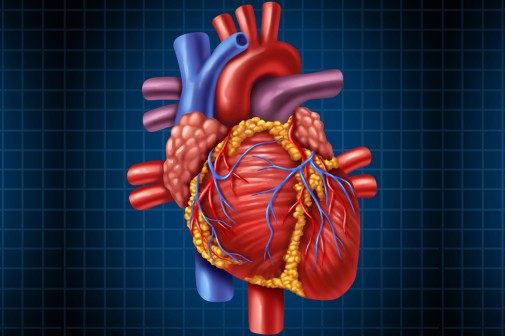

Heart Attack is common amongst people suffering from cardiovascular diseases (CVDs) or who have high blood pressure, high cholesterol, and hypertension. Some risk factors for heart disease cannot be controlled, such as your age or family history. Early detection and management play a vital role in improving heart health.

This dataset contains 14 features that can predict possible heart disease. Moreover, this machine learning model can assist enormously in detecting heart attacks.


Attribute Information:
---
1. Age: age of the patient (years)
2. Sex: sex of the patient (M: Male, F: Female)
3. exang: exercise induced angina (1 = yes; 0 = no)
4. ca : number of major vessels (0-3)
5. cp : Chest Pain type chest pain type
(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
6. trtbps : resting blood pressure (in mm Hg)
7. chol : cholestoral in mg/dl fetched via BMI sensor
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
9. rest_ecg : resting electrocardiographic results
(0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
10. thalach : maximum heart rate achieved
11. target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
#importing the usual libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#clearing any warnings in Python
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd

In [ ]:
#reading the data using the pandas library
hs_data=pd.read_csv("/content/heart.csv")
hs_data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
hs_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
hs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
hs_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
#defining the columns as categorical and continuous
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

## **Encoding the dataset**

In [ ]:
from sklearn import preprocessing

In [ ]:
#encoding data
labelDict = {}
for feature in hs_data:
    le = preprocessing.LabelEncoder()
    le.fit(hs_data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    hs_data[feature] = le.transform(hs_data[feature])
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_age [29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]
label_sex [0, 1]
label_cp [0, 1, 2, 3]
label_trtbps [94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200]
label_chol [126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 2

## **Exploratory Analysis**

In [ ]:
#importing library required for exploratory analysis
import plotly.express as px

In [ ]:
# lighter shades represents positive correlation
# darker shades represents negative correlation
px.imshow(hs_data.corr(),title="Correlation Plot of the Heat Failure Prediction")

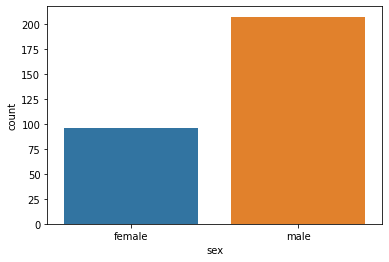

In [ ]:
sb.countplot(x = "sex",  data= hs_data)
plt.xticks(ticks=[0, 1], labels = ["female", "male"])
plt.show()

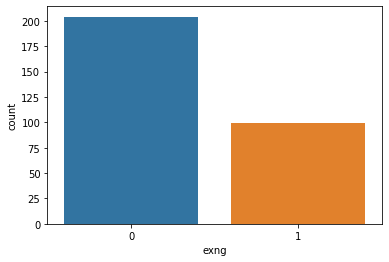

In [ ]:
sb.countplot(x = "exng",  data= hs_data)
plt.xticks(ticks=[0, 1], labels = ["0", "1"])
plt.show()

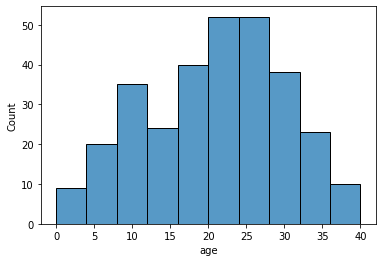

In [ ]:
sb.histplot(x = "age", data=hs_data)
plt.show()

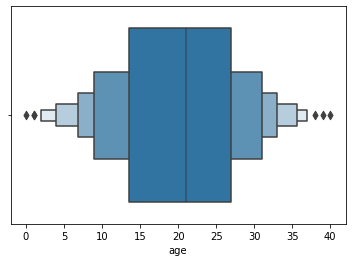

In [ ]:
sb.boxenplot(x = "age", data=hs_data)
plt.show()

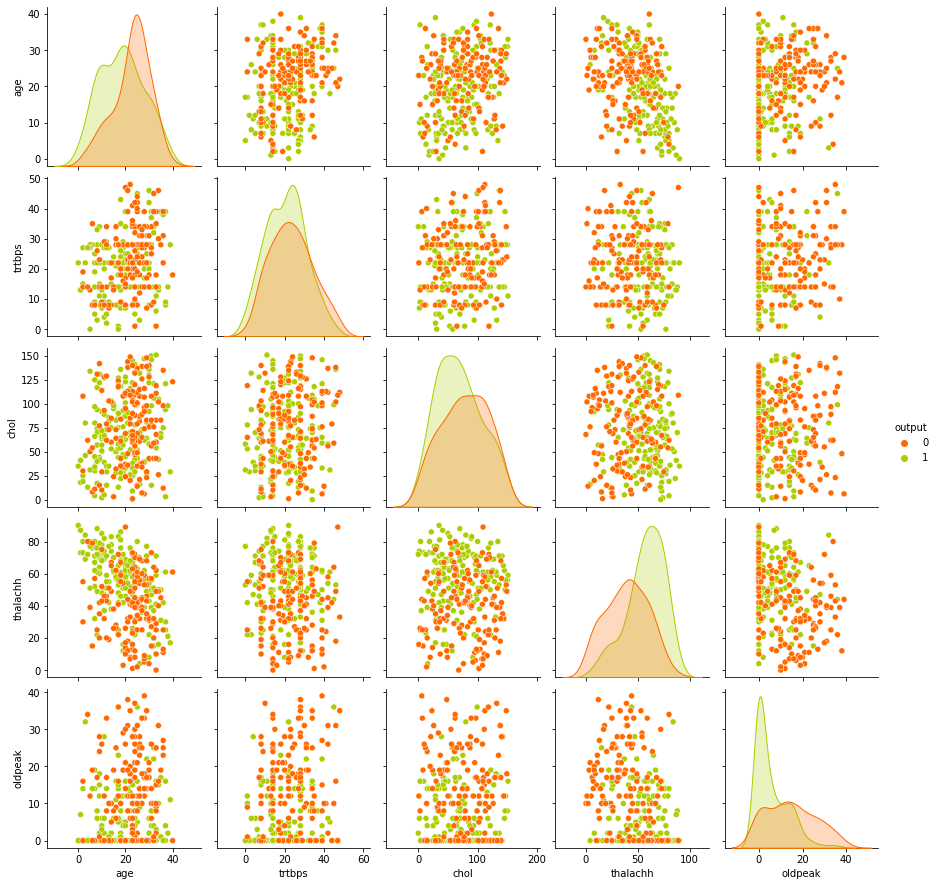

In [ ]:
cols = con_cols + ['output']
sb.pairplot(hs_data[cols], hue = 'output', palette = ["#ff6900","#adcd00"])  #palette arg selects the two colors for the target variable
plt.show()

## **Testing and Training the data**

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hs_data[con_cols] = scaler.fit_transform(hs_data[con_cols])

In [ ]:
#defining the feature input and the label input

#droping some fields
all_inputs = hs_data.drop(['output'], axis=1).values

#extracting the class labels
all_labels = hs_data['output'].values

all_inputs[:10]

array([[ 0.96637893,  1.        ,  3.        ,  0.8721773 , -0.23503517,
         1.        ,  0.        , -0.00733269,  0.        ,  1.18051156,
         0.        ,  0.        ,  1.        ],
       [-1.94718143,  1.        ,  2.        ,  0.01291881,  0.1812785 ,
         0.        ,  1.        ,  1.64720244,  0.        ,  2.14961209,
         0.        ,  0.        ,  2.        ],
       [-1.49894138,  0.        ,  1.        ,  0.01291881, -0.98960371,
         0.        ,  0.        ,  1.03266082,  0.        ,  0.40523114,
         2.        ,  0.        ,  2.        ],
       [ 0.18195883,  1.        ,  1.        , -0.75086651, -0.15697636,
         0.        ,  1.        ,  1.26902299,  0.        , -0.17622917,
         2.        ,  0.        ,  2.        ],
       [ 0.29401885,  0.        ,  0.        , -0.75086651,  1.8725528 ,
         0.        ,  1.        ,  0.60720893,  1.        , -0.37004928,
         2.        ,  0.        ,  2.        ],
       [ 0.29401885,  1.      

In [ ]:
#spliting the data into training and testing. 
#80% of the data is used for training, while 20% of the data is used for testing.
from sklearn.model_selection import train_test_split
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.2, random_state=0)

In [ ]:
print('Shape for training data', training_inputs.shape, training_classes.shape)
print('Shape for testing data', testing_inputs.shape, testing_classes.shape)

Shape for training data (242, 13) (242,)
Shape for testing data (61, 13) (61,)


## **Building The Model**

### **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier=RandomForestClassifier ()
rf_classifier.fit(training_inputs,training_classes)
rf_predict=rf_classifier.predict(testing_inputs)

In [ ]:
print("Accuracy of Random Forest Classifier: "+str(rf_classifier.score(testing_inputs, testing_classes)))

Accuracy of Random Forest Classifier: 0.8360655737704918


In [ ]:
print('Classification Report:\n',classification_report(testing_classes,rf_classifier.predict(testing_inputs)))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model=GradientBoostingClassifier().fit(training_inputs, training_classes)
gb_predict=model.predict(testing_inputs)

In [ ]:
print('Accuracy of Gradient Boosting Classifier: ',accuracy_score(testing_classes,gb_predict))

Accuracy of Gradient Boosting Classifier:  0.819672131147541


In [ ]:
print('Classification Report:\n',classification_report(testing_classes,gb_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr_classifier=LogisticRegression().fit(training_inputs,training_classes)
lgr_predict=lgr_classifier.predict(testing_inputs)

In [ ]:
print("Accuracy of Logistic Regression: "+str(lgr_classifier.score(testing_inputs, testing_classes)))

Accuracy of Logistic Regression: 0.8524590163934426


In [ ]:
print('Classification Report:\n',classification_report(testing_classes,lgr_classifier.predict(testing_inputs)))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



## **Evaluation of the above models**

### **Based on Confusion Matrix**

In [ ]:
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score, 
                             roc_curve,
                             roc_auc_score,
                             confusion_matrix)

Confusion Matrix of Logistics Regression Model:
 [[21  6]
 [ 3 31]]



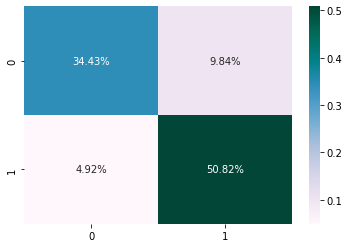

In [ ]:
conf = confusion_matrix(testing_classes, lgr_predict)
print ("Confusion Matrix of Logistics Regression Model:\n", conf)
print("")
sb.heatmap(conf/np.sum(conf), annot = True, fmt=  '0.2%', cmap = 'PuBuGn');

Confusion Matrix of Random Forest Classifier Model:
 [[22  5]
 [ 5 29]]



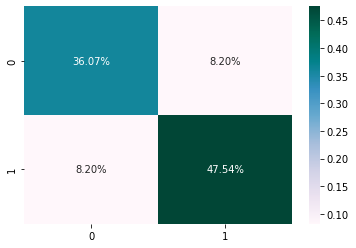

In [ ]:
conf = confusion_matrix(testing_classes, rf_predict)
print ("Confusion Matrix of Random Forest Classifier Model:\n", conf)
print("")
sb.heatmap(conf/np.sum(conf), annot = True, fmt=  '0.2%', cmap = 'PuBuGn');

Confusion Matrix of Gradient Boosting Classifier Model:
 [[21  6]
 [ 5 29]]



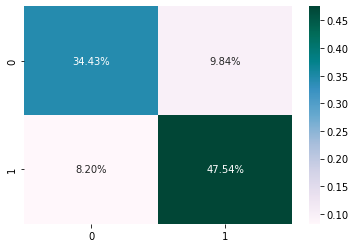

In [ ]:
conf = confusion_matrix(testing_classes, gb_predict)
print ("Confusion Matrix of Gradient Boosting Classifier Model:\n", conf)
print("")
sb.heatmap(conf/np.sum(conf), annot = True, fmt=  '0.2%', cmap = 'PuBuGn');

### **F-1 Score**

In [ ]:
f1 = f1_score(testing_classes, lgr_predict)
print ("F1 Score of Logistics Regression Model: \n", f1)

F1 Score of Logistics Regression Model: 
 0.8732394366197184


In [ ]:
f1 = f1_score(testing_classes, rf_predict)
print ("F1 Score of Random Forest Classifier: \n", f1)

F1 Score of Random Forest Classifier: 
 0.8529411764705882


In [ ]:
f1 = f1_score(testing_classes, gb_predict)
print ("F1 Score : \n", f1)

F1 Score : 
 0.8405797101449276


### **ROC Curve**

In [ ]:
fpr_lgr, tpr_lgr, thresholds_lgr = roc_curve(testing_classes, lgr_predict)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(testing_classes, rf_predict)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(testing_classes, gb_predict)

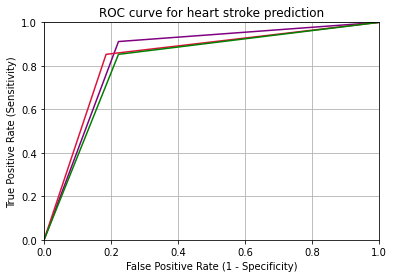

In [ ]:
plt.plot(fpr_lgr, tpr_lgr, color='purple', label='LogisticRegression')
plt.plot(fpr_rf, tpr_rf, color='crimson', label='RandomForestClassifier')
plt.plot(fpr_gb, tpr_gb, color='green', label='GradientBoosterClassifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart stroke prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# **Evaluation Result**

• Based on the ROC curve and the F-1 score, Logistic Regression Classifier performs the best.

• Hence, I'm choosing the Logistic Regression Classifier as the final model.

In [ ]:
import pickle
pickle.dump(lgr_classifier,open('HeartAttackPrediction.pkl','wb'))

In [ ]:
file_read=pickle.load(open('HeartAttackPrediction.pkl','rb'))

In [ ]:
file_read.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

array([0])